# YouTube Recommendation System's Evolutionary Dynamics (valued watch time)

## Imports

In [1]:
from recommendation_systems_evolutionary_dynamics import EGT, OUTPUT_PATH
import numpy as np
import posixpath
import matplotlib.pylab as plt

## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

(r1, r2): (0.4, 0.0) | (ul, uh): (0.2, 0.4)


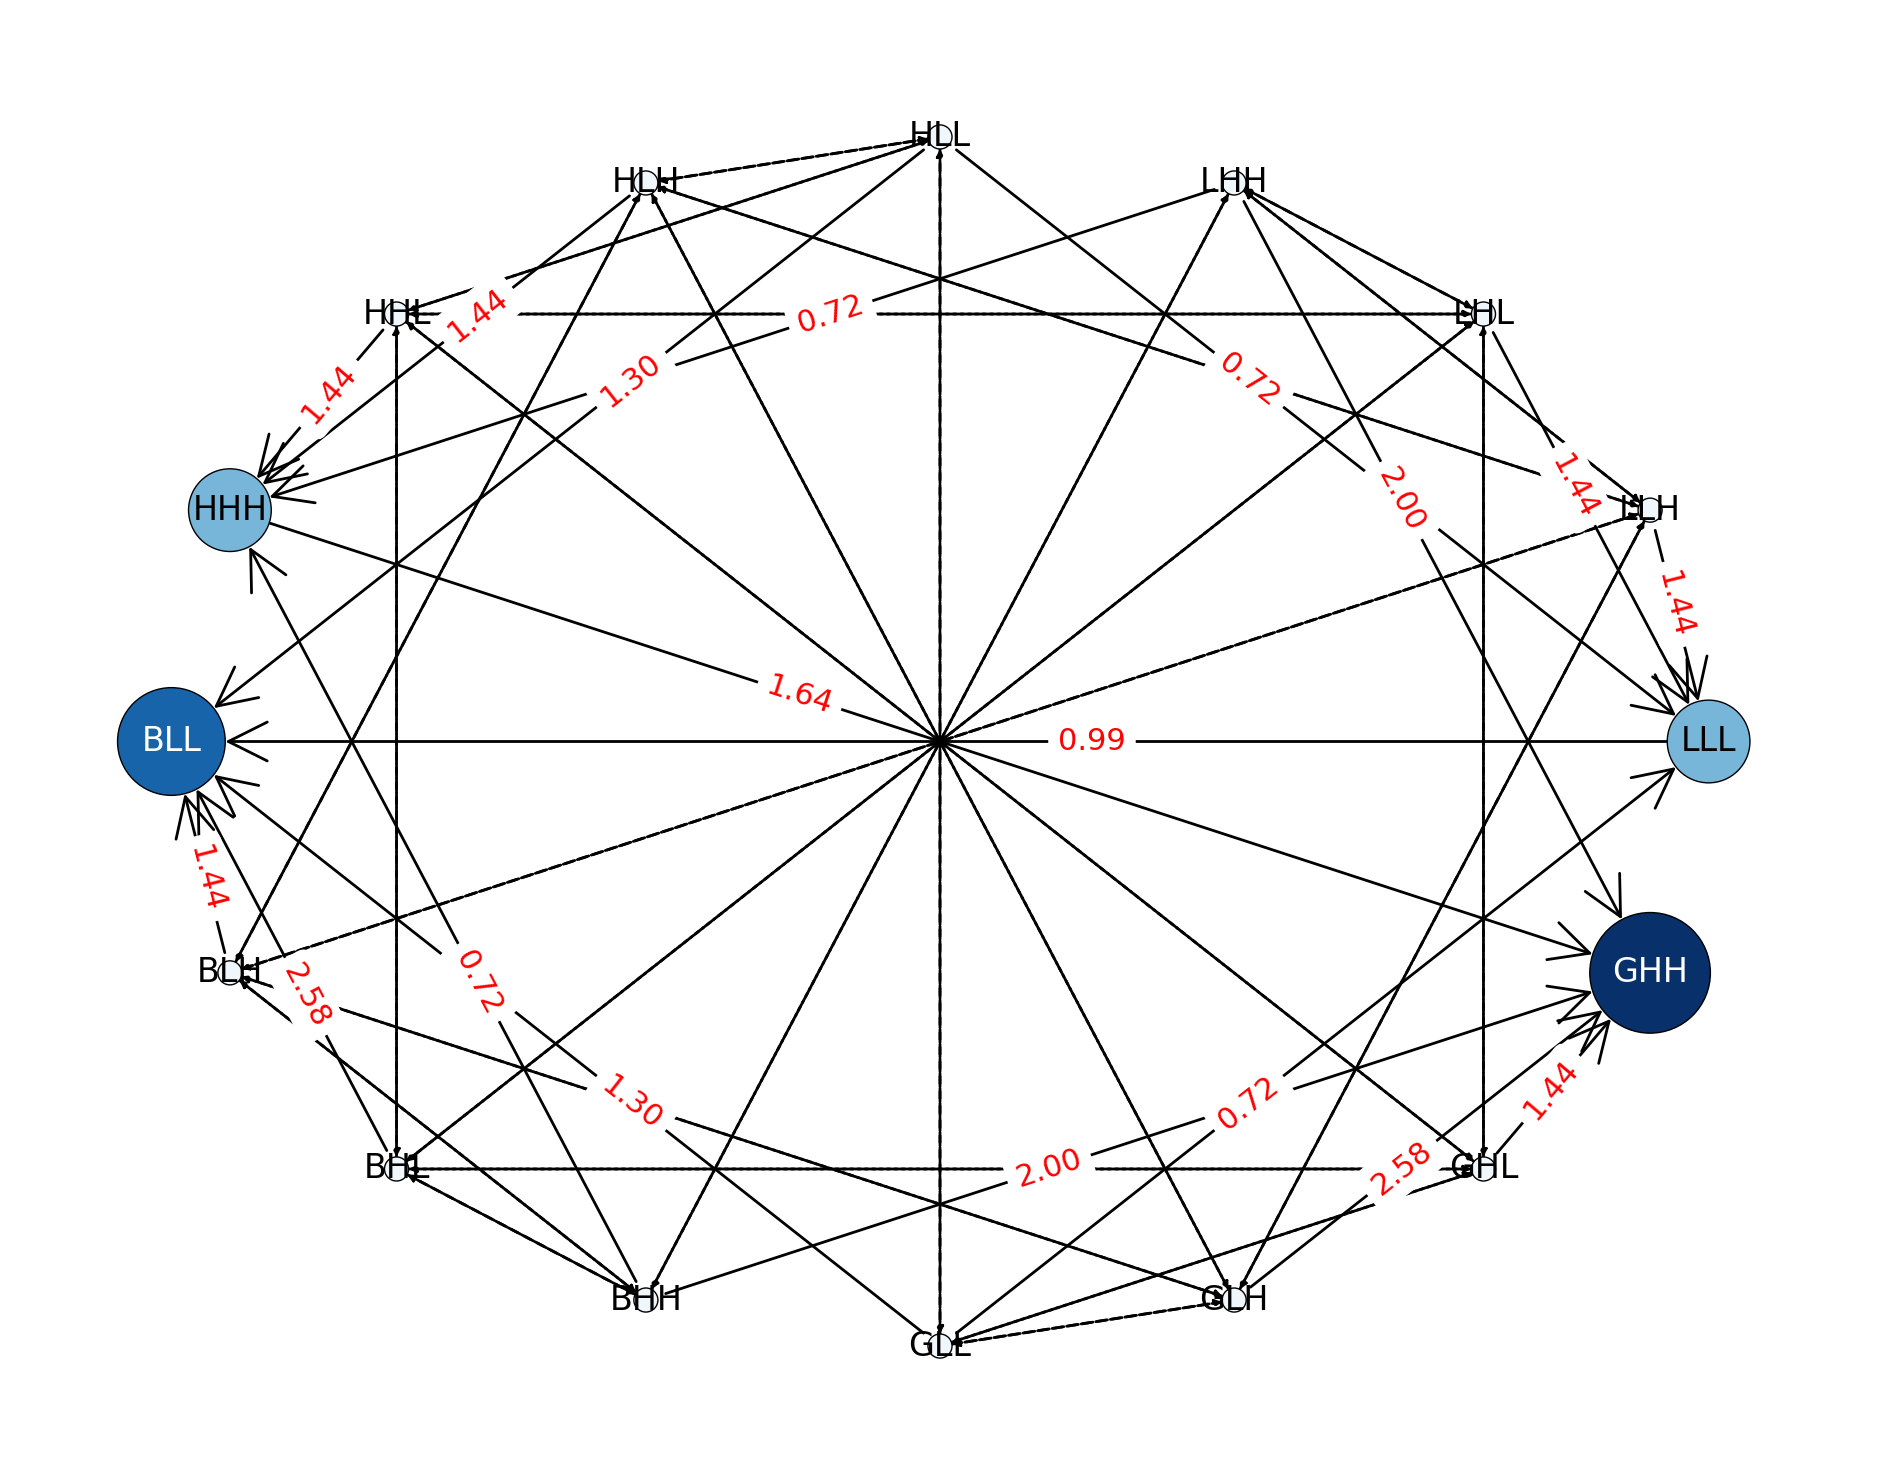

['LLL', 'LLH', 'LHL', 'LHH', 'HLL', 'HLH', 'HHL', 'HHH', 'BLL', 'BLH', 'BHL', 'BHH', 'GLL', 'GLH', 'GHL', 'GHH'] [0.04310159 0.03656187 0.03371269 0.02173128 0.02533297 0.03284638
 0.03562234 0.03279675 0.16039954 0.0529436  0.03303119 0.02573683
 0.03780045 0.04054709 0.06977974 0.31805569]


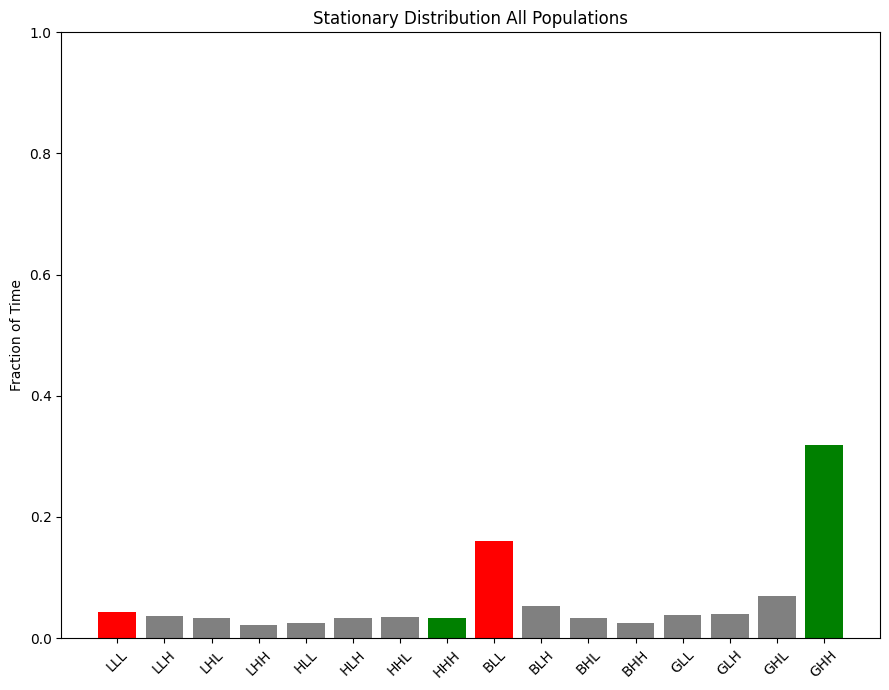

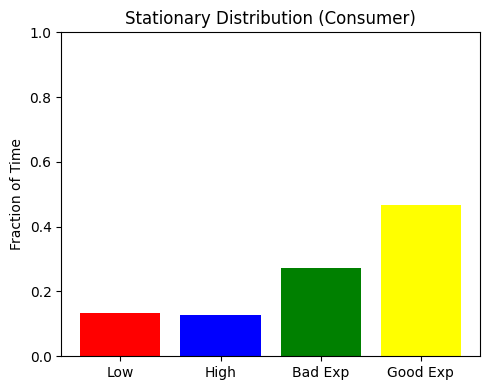

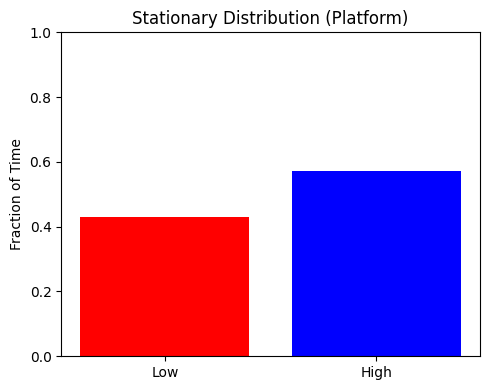

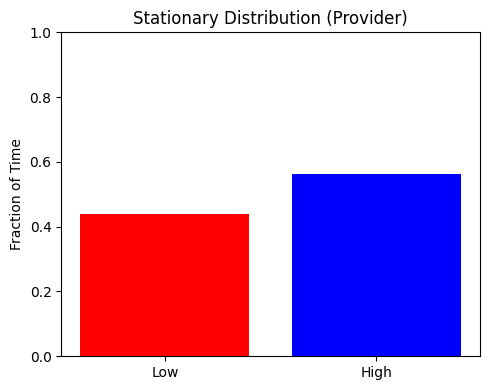

(r1, r2): (0.0, 0.4) | (ul, uh): (0.2, 0.4)


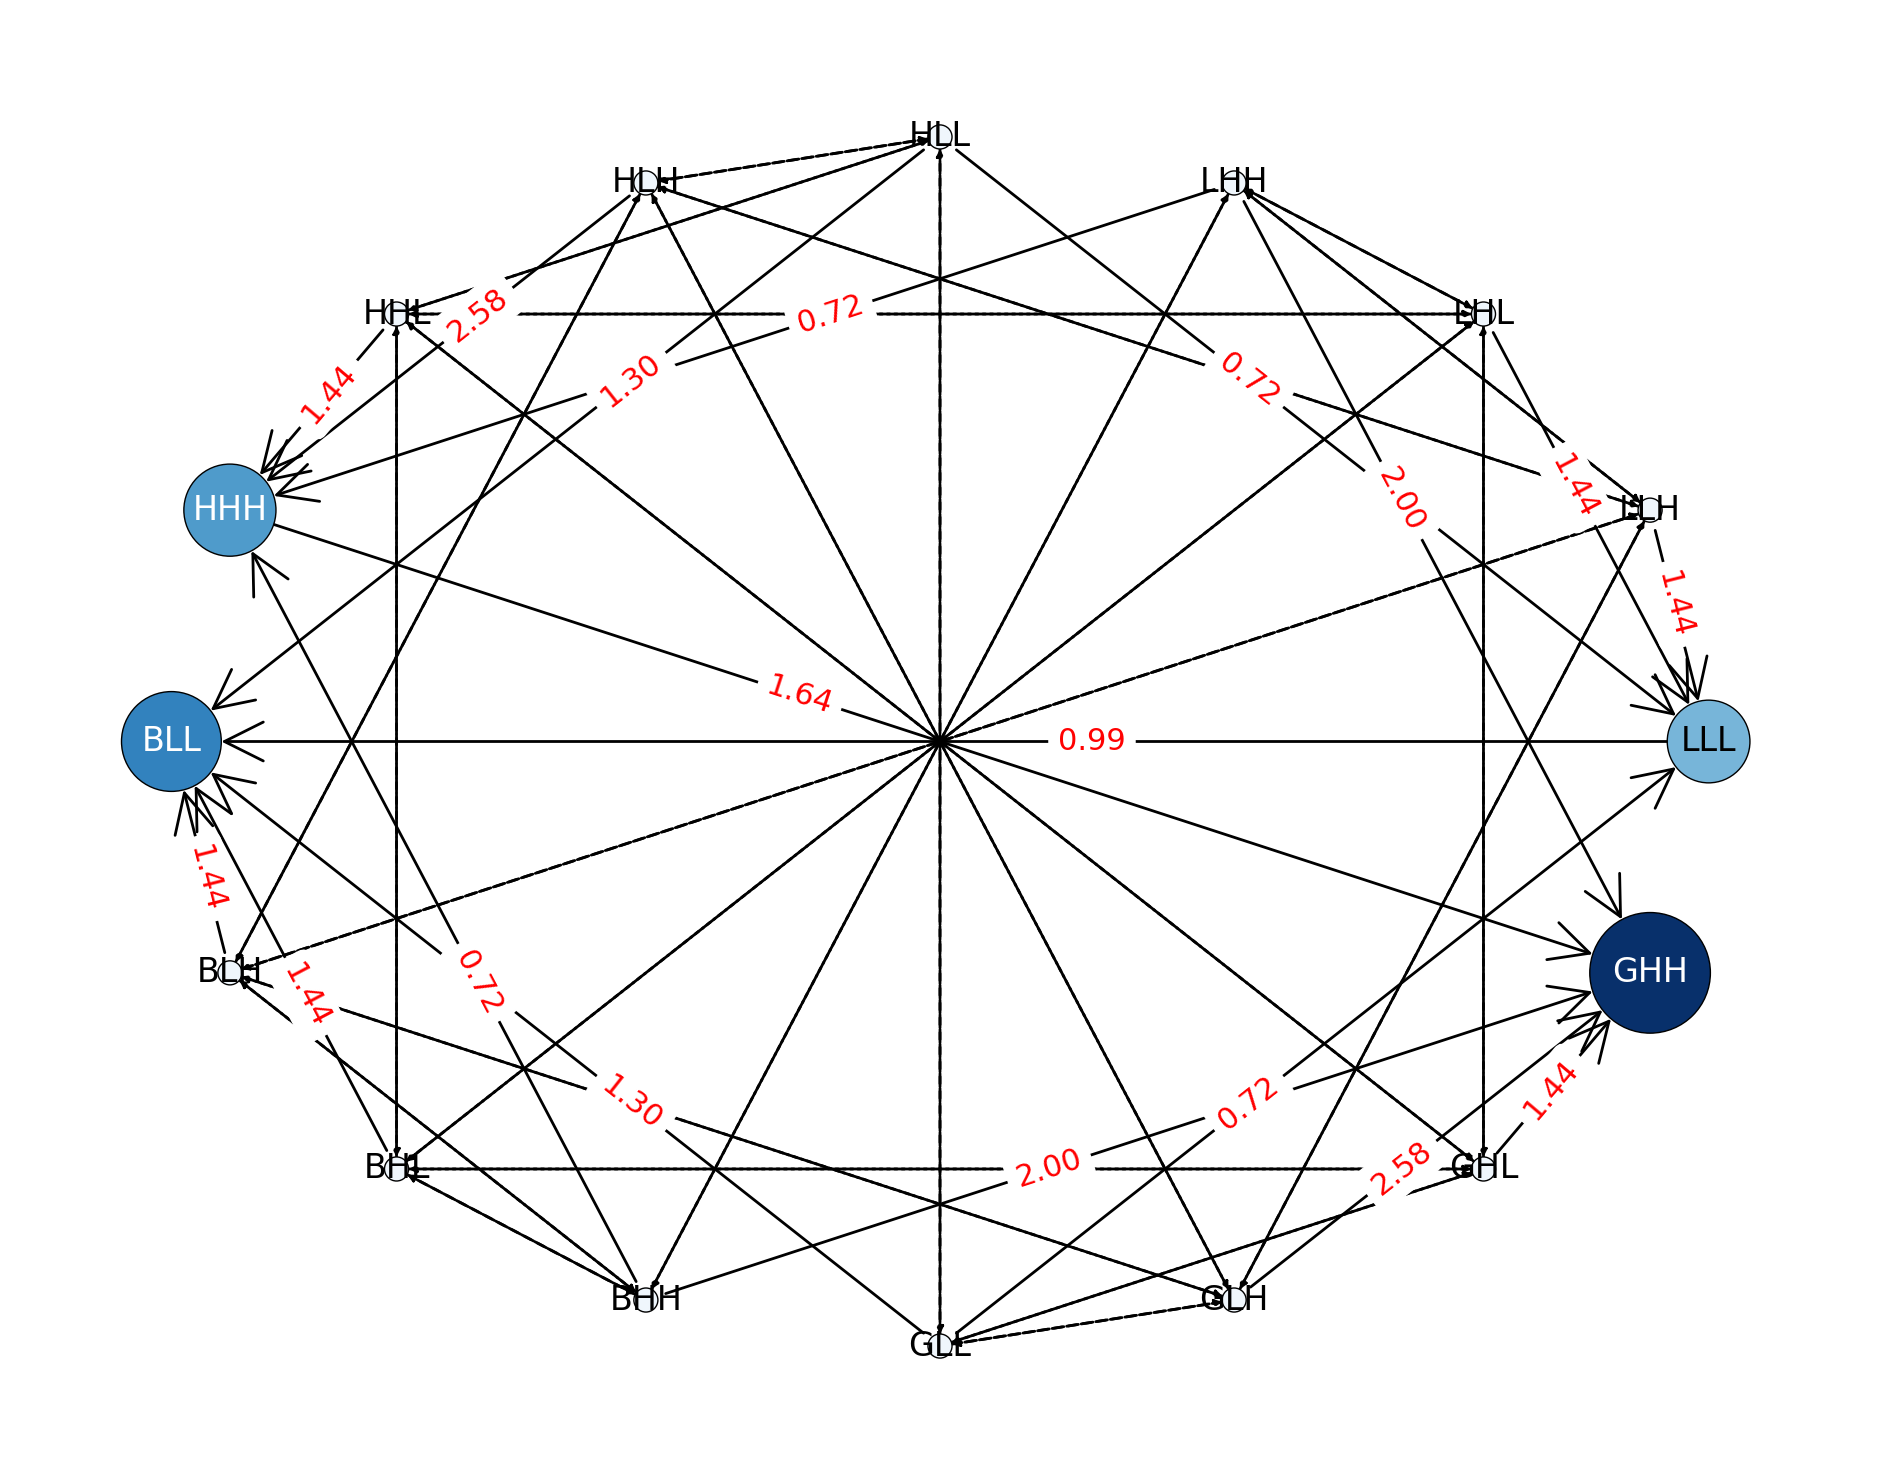

['LLL', 'LLH', 'LHL', 'LHH', 'HLL', 'HLH', 'HHL', 'HHH', 'BLL', 'BLH', 'BHL', 'BHH', 'GLL', 'GLH', 'GHL', 'GHH'] [0.04359069 0.03697676 0.03409525 0.02197788 0.02476734 0.02656697
 0.03900911 0.03861139 0.12115188 0.04917887 0.04534647 0.02923045
 0.03969087 0.04257486 0.07326945 0.33396176]


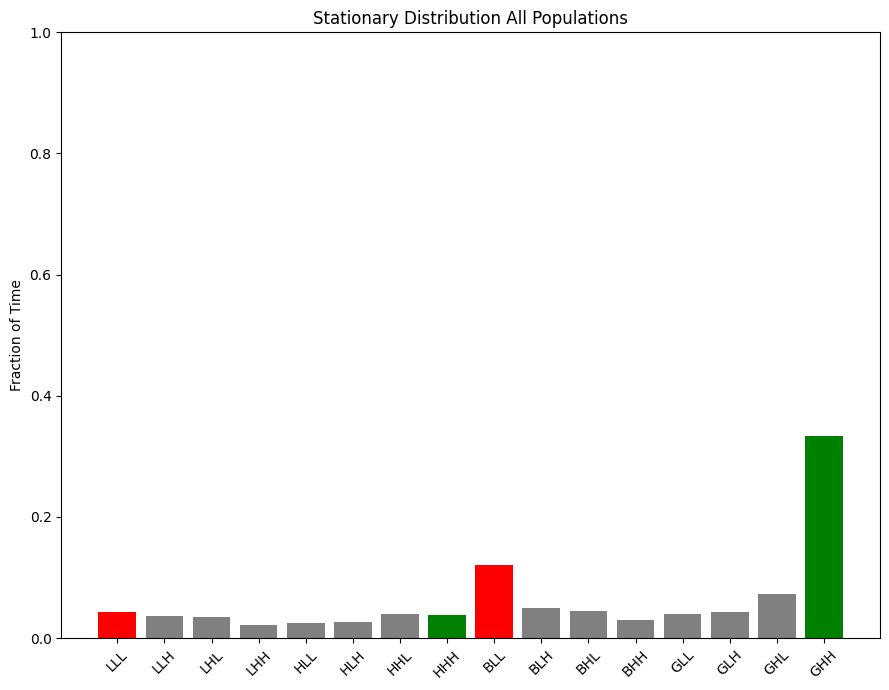

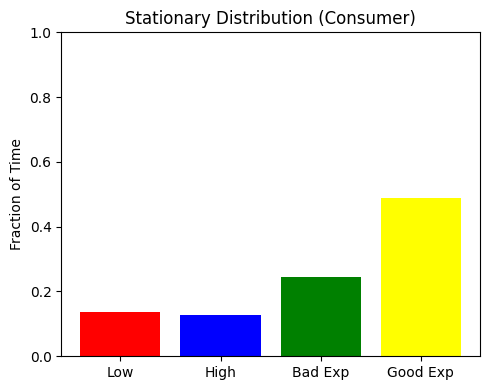

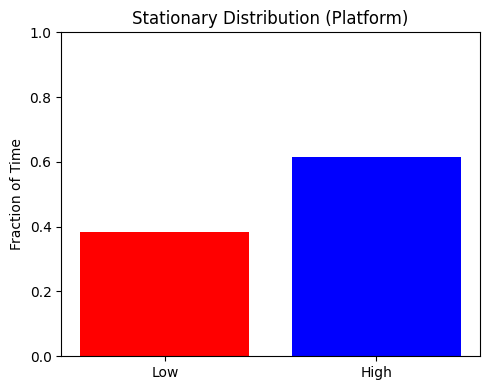

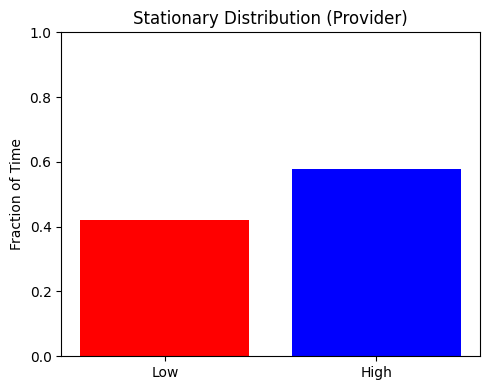

(r1, r2): (0.0, 0.8) | (ul, uh): (0.2, 0.4)


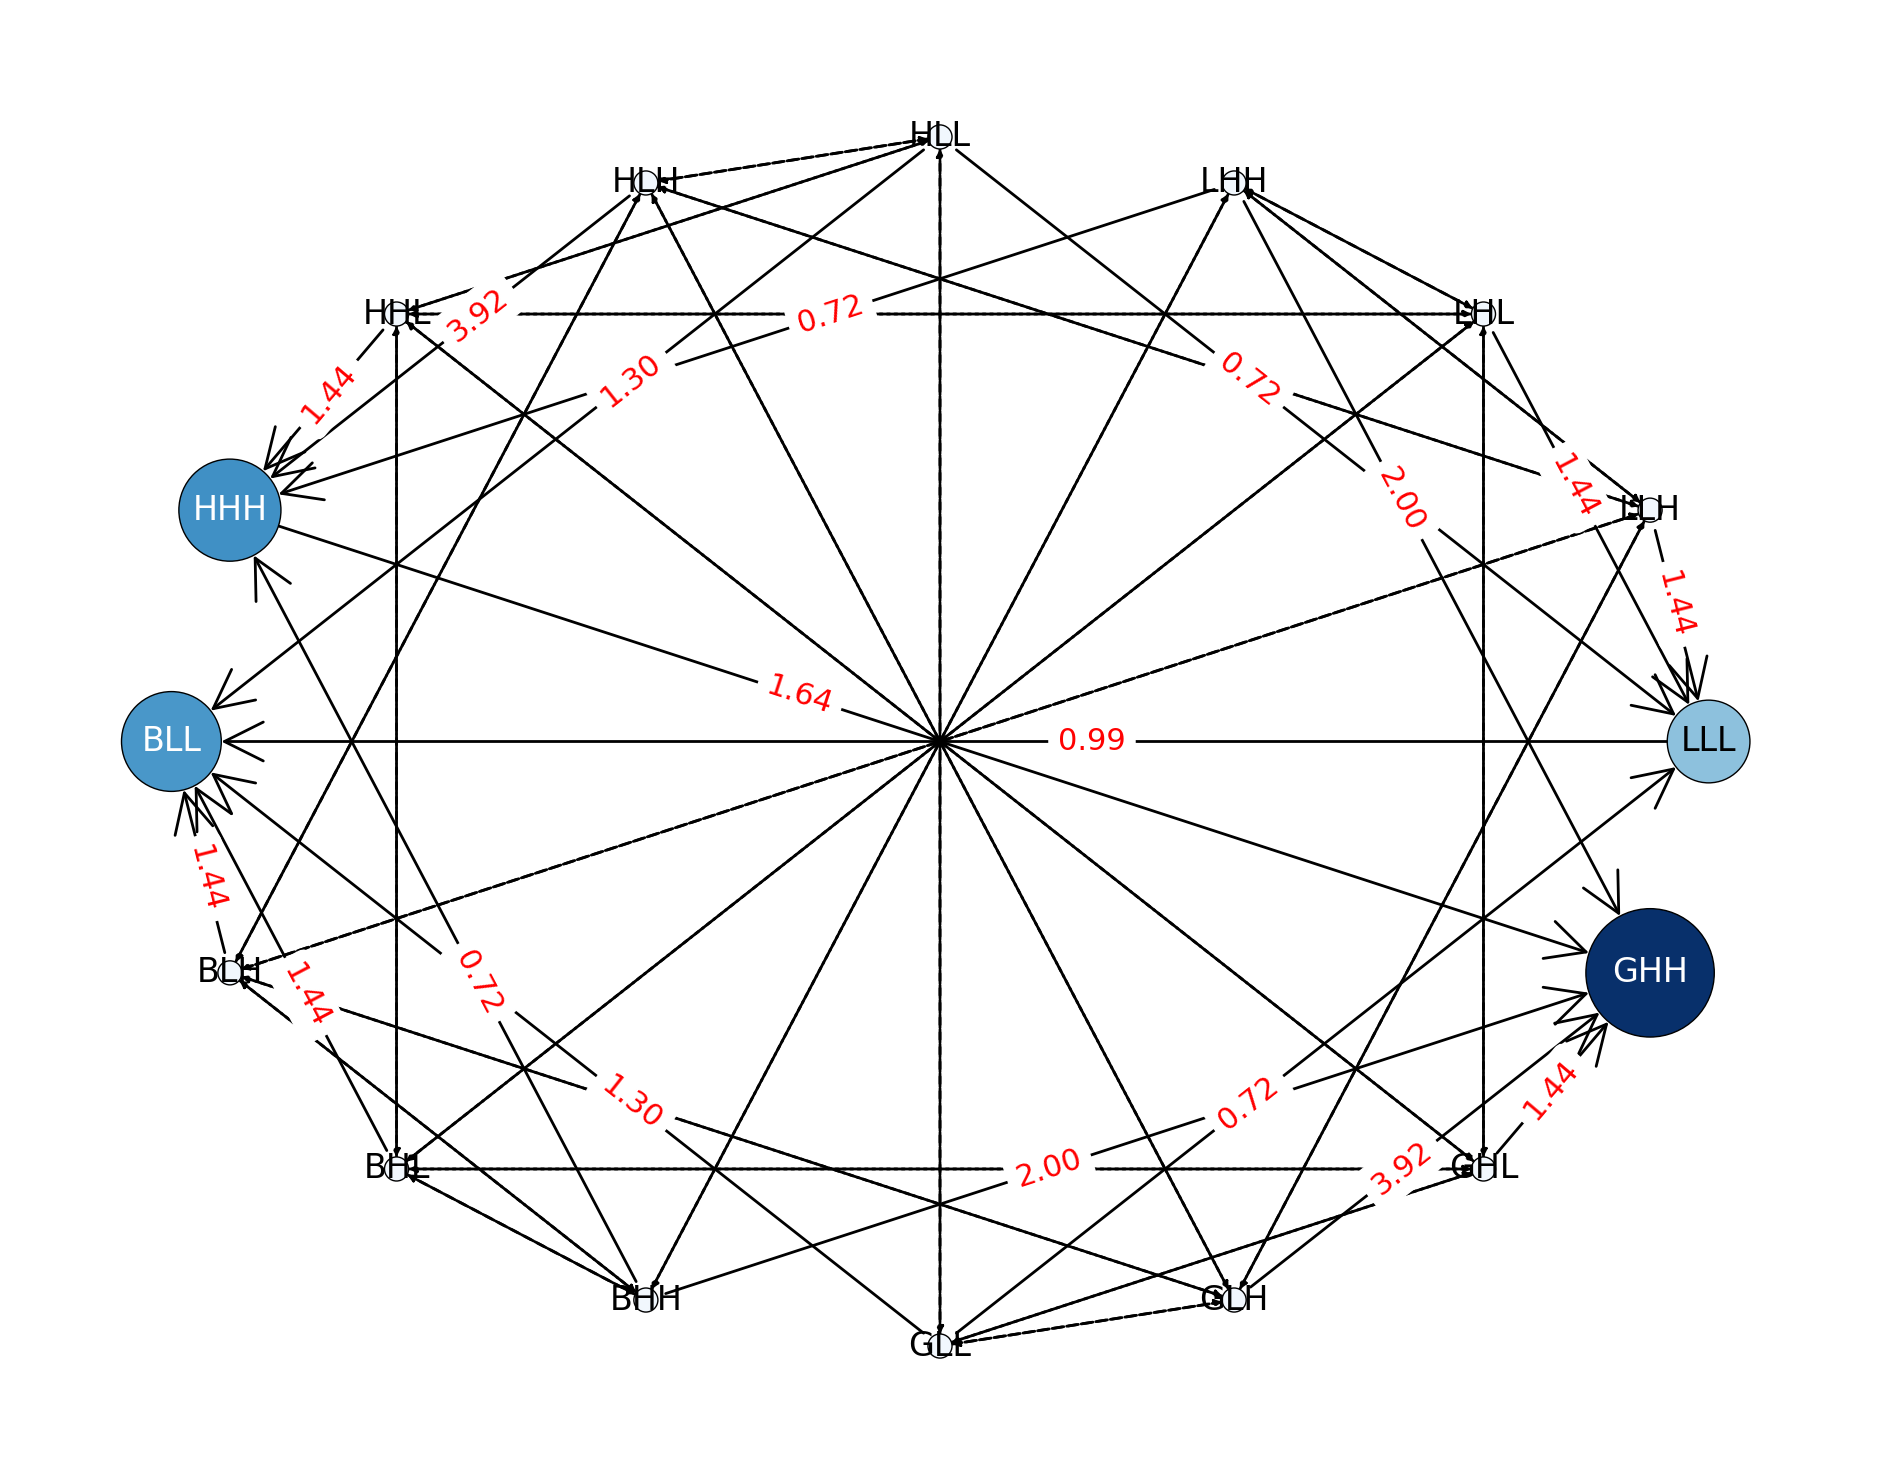

['LLL', 'LLH', 'LHL', 'LHH', 'HLL', 'HLH', 'HHL', 'HHH', 'BLL', 'BLH', 'BHL', 'BHH', 'GLL', 'GLH', 'GHL', 'GHH'] [0.03974609 0.03371549 0.03108812 0.02003948 0.02227867 0.01985572
 0.03779665 0.03858767 0.10982071 0.04457924 0.04110528 0.02649657
 0.03303623 0.02944333 0.07495759 0.39745315]


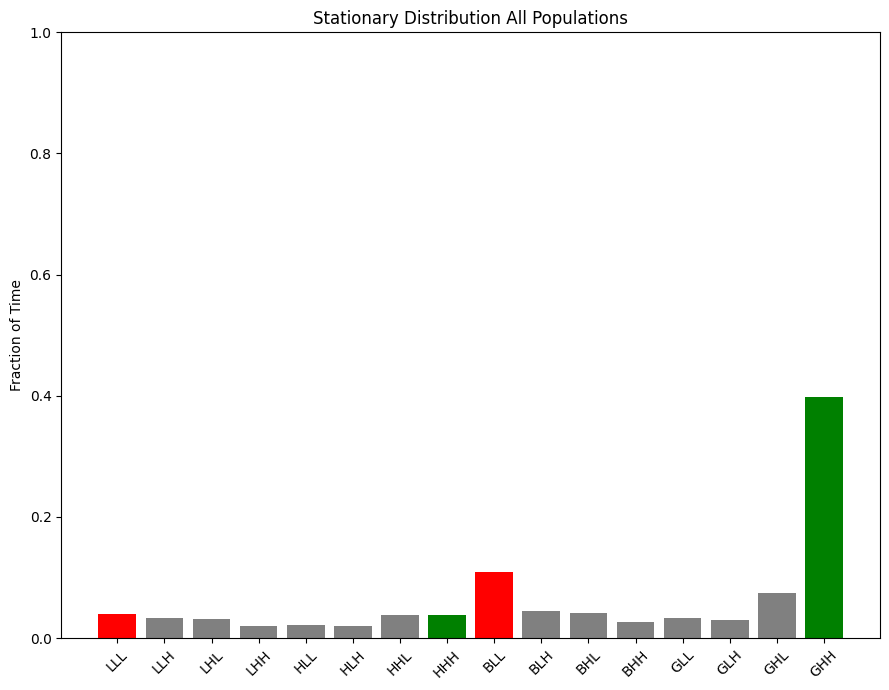

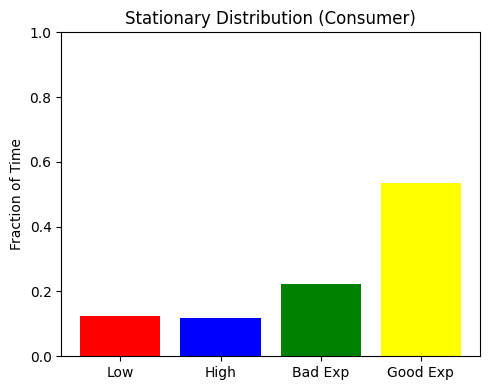

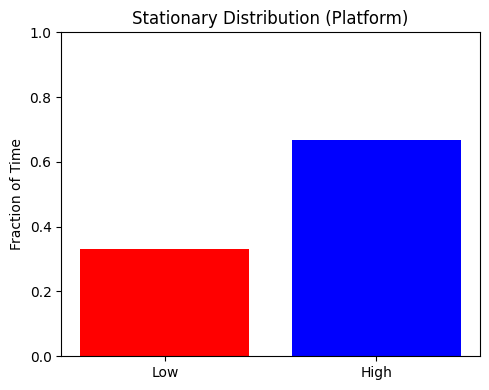

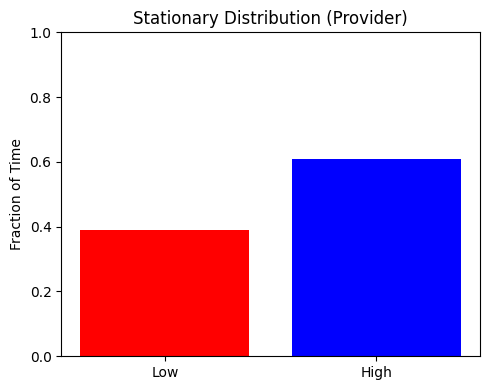

(r1, r2): (0.4, 0.4) | (ul, uh): (0.2, 0.4)


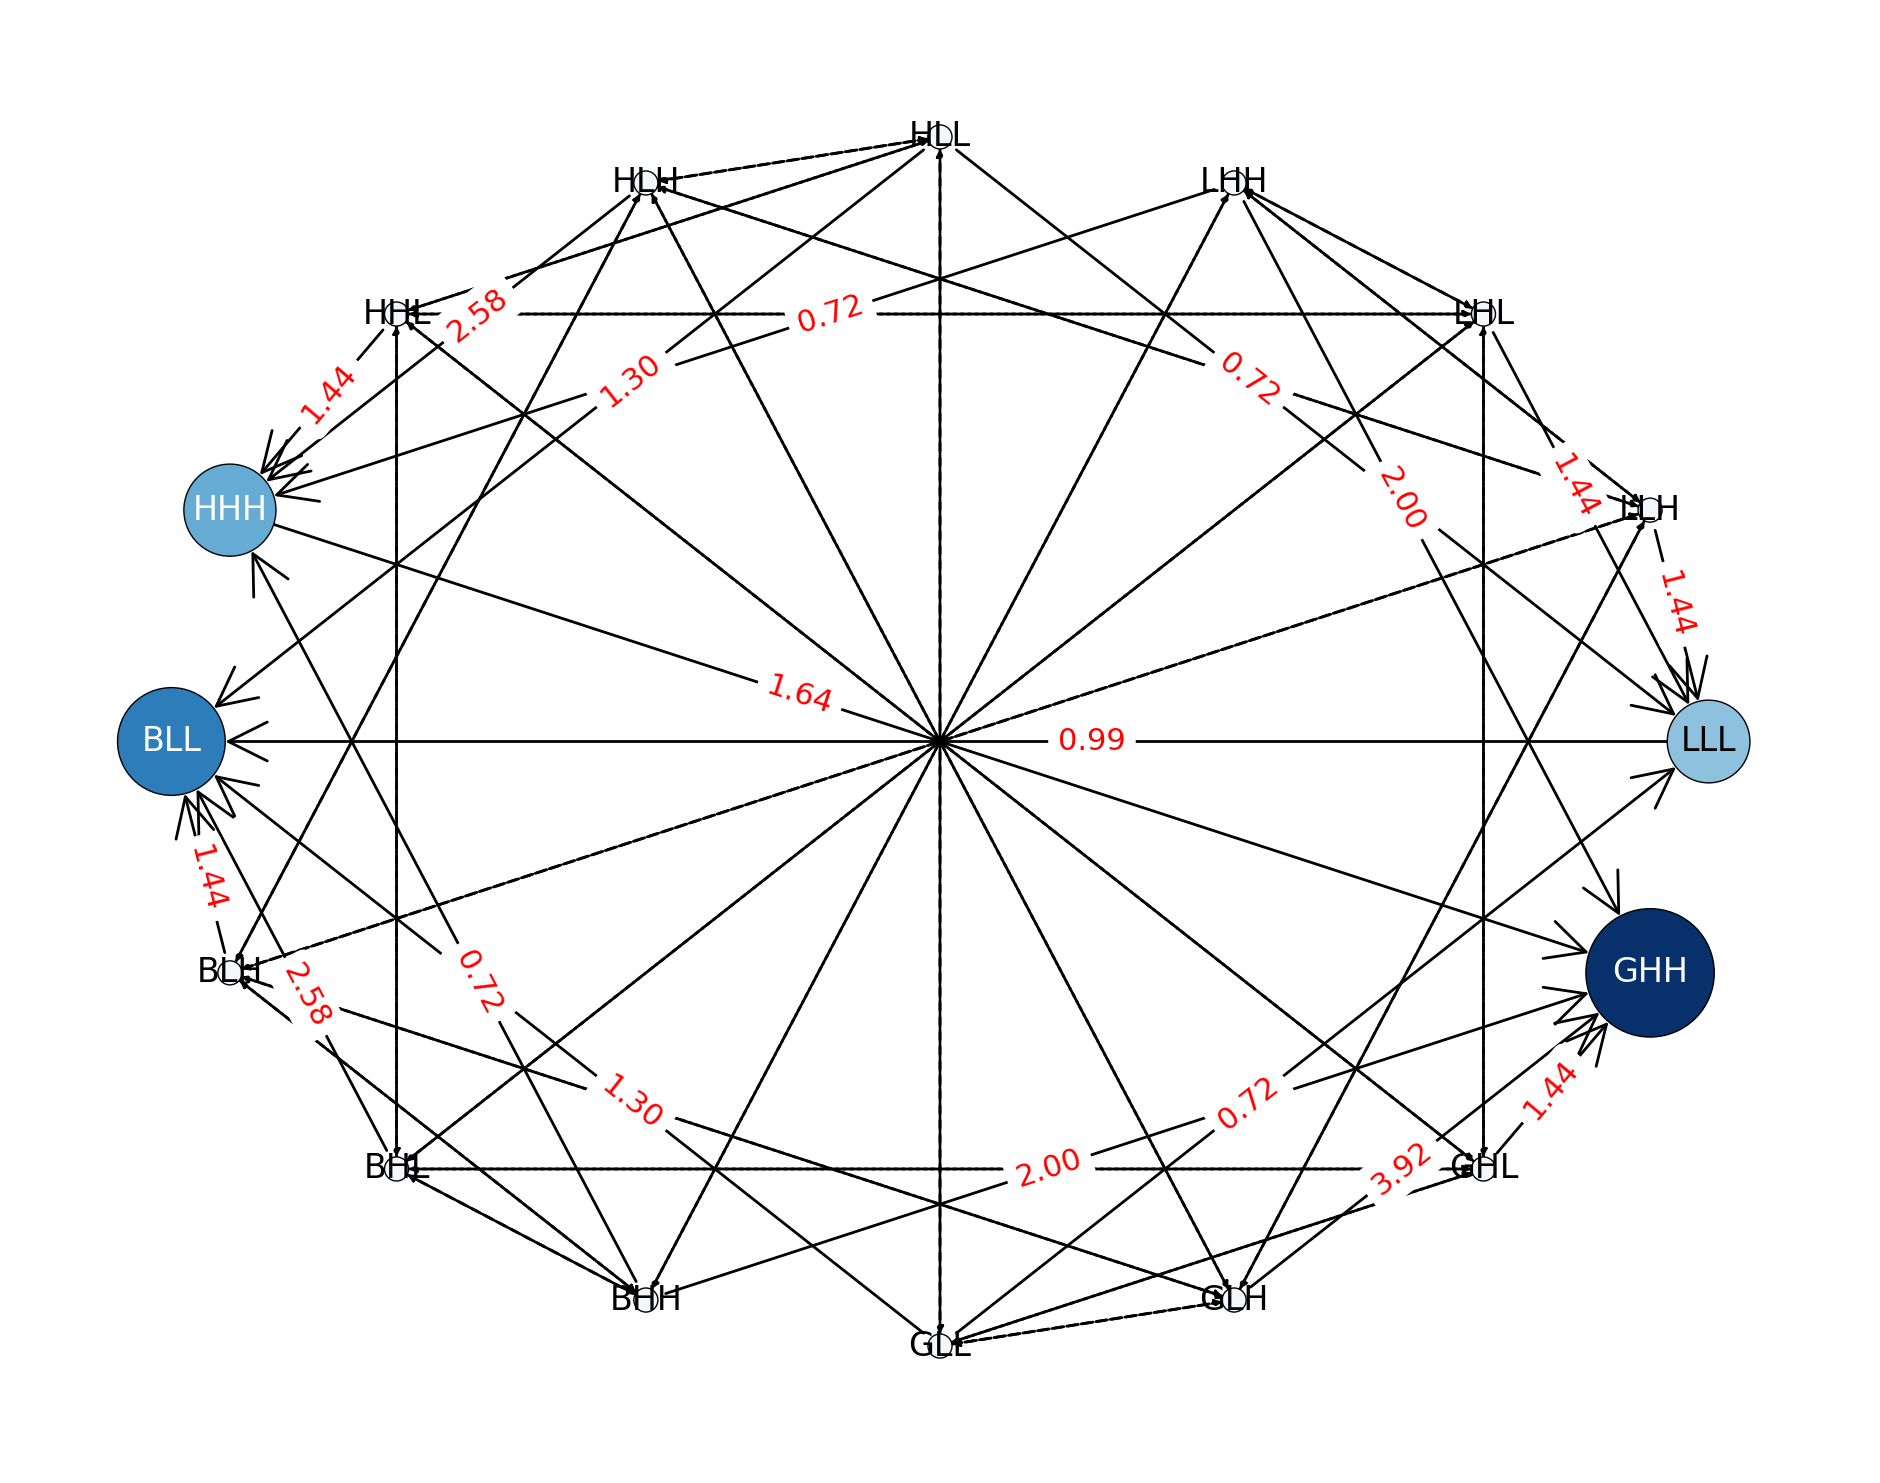

['LLL', 'LLH', 'LHL', 'LHH', 'HLL', 'HLH', 'HHL', 'HHH', 'BLL', 'BLH', 'BHL', 'BHH', 'GLL', 'GLH', 'GHL', 'GHH'] [0.03935843 0.03338666 0.03078491 0.01984403 0.02234106 0.02396439
 0.03518766 0.03482889 0.14556773 0.04804802 0.02997687 0.023357
 0.03170611 0.02825788 0.07193962 0.38145074]


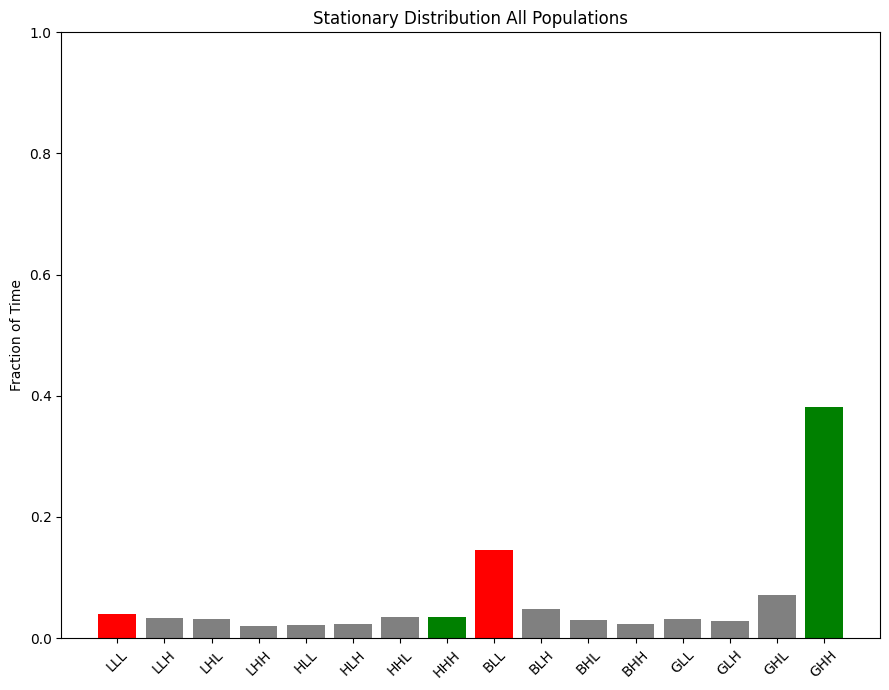

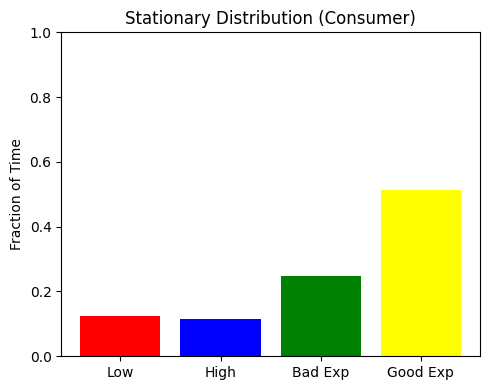

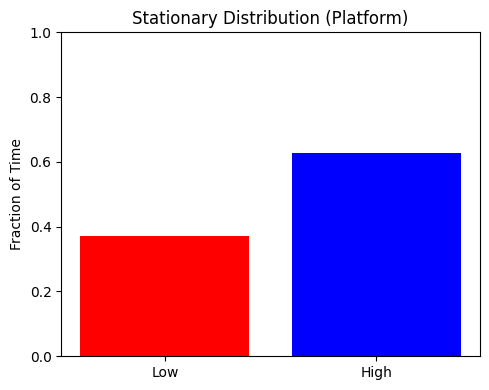

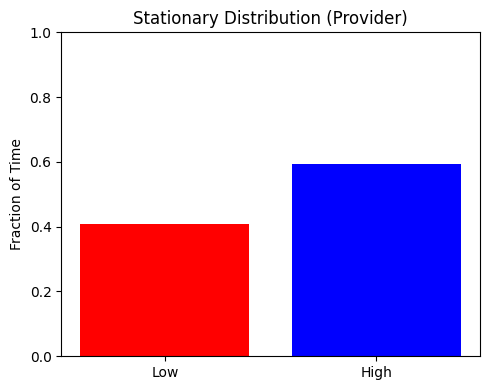

(r1, r2): (0.4, 0.8) | (ul, uh): (0.2, 0.4)


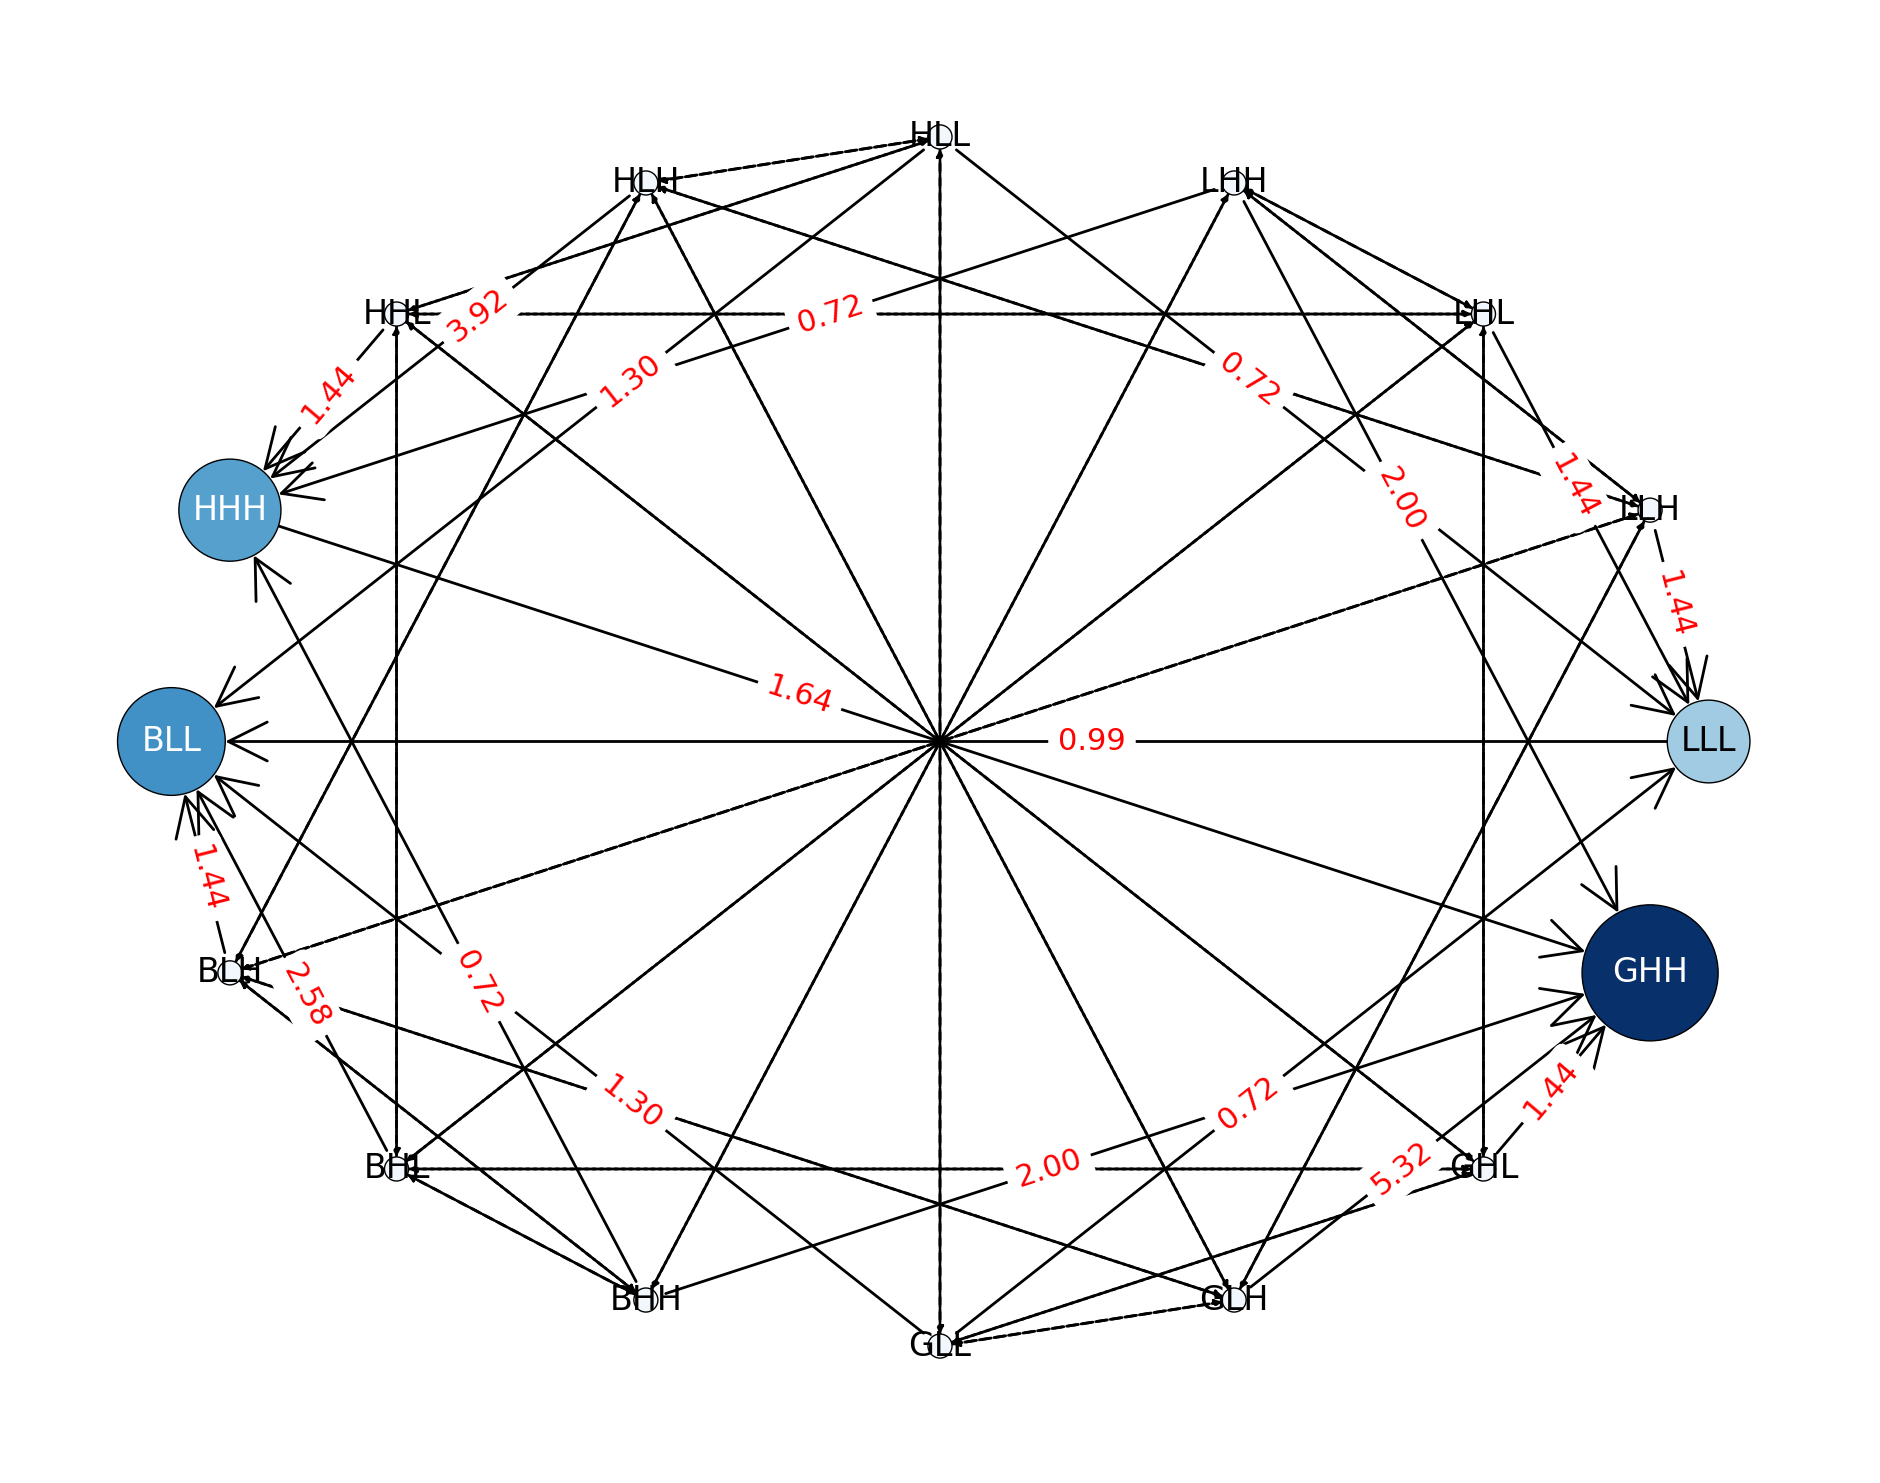

['LLL', 'LLH', 'LHL', 'LHH', 'HLL', 'HLH', 'HHL', 'HHH', 'BLL', 'BLH', 'BHL', 'BHH', 'GLL', 'GLH', 'GHL', 'GHH'] [0.03758407 0.03188151 0.02939706 0.01894942 0.02091956 0.01864443
 0.03549088 0.03623364 0.13858896 0.04574451 0.02853972 0.02223722
 0.02902803 0.02197948 0.07337713 0.41140437]


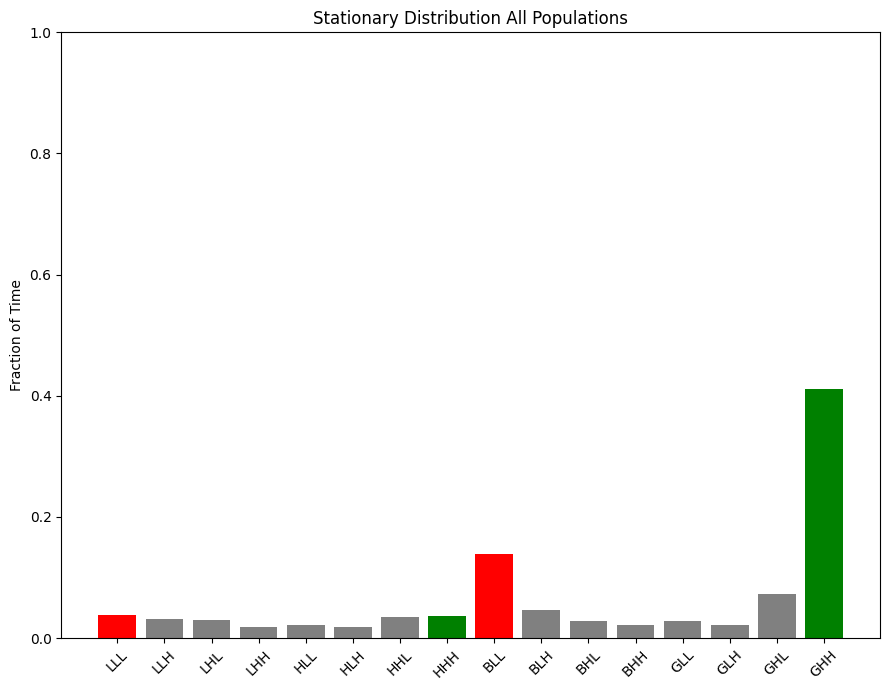

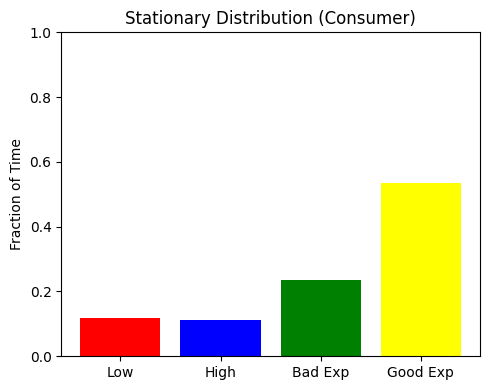

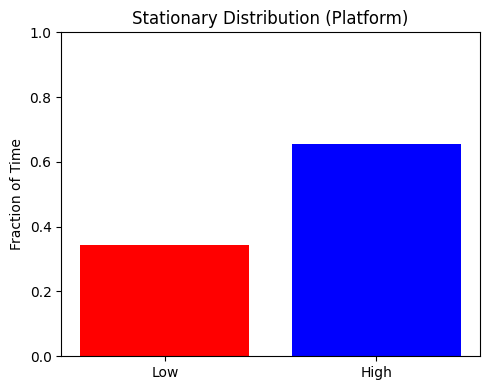

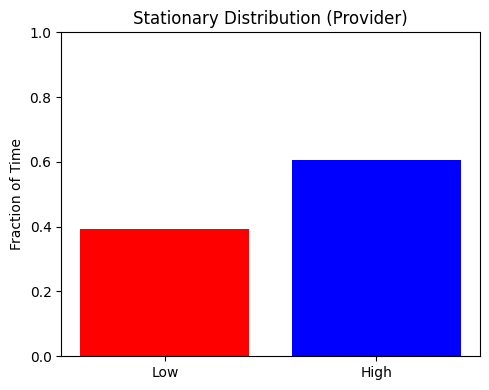

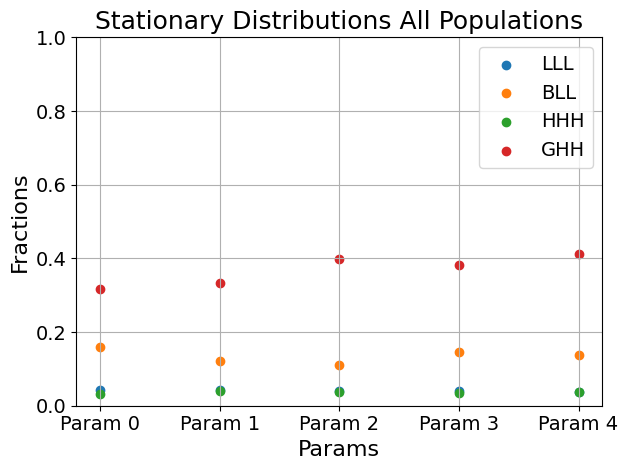

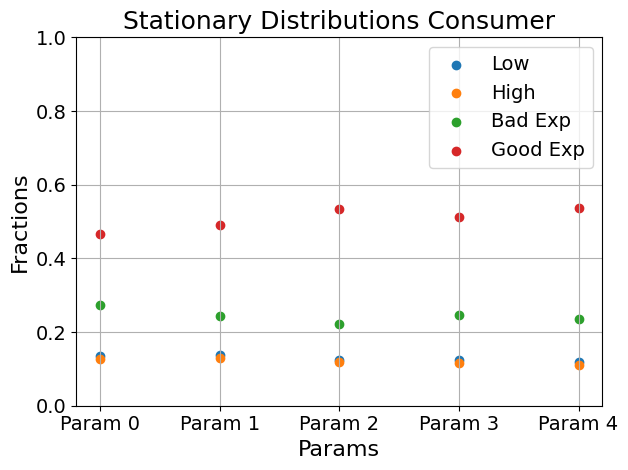

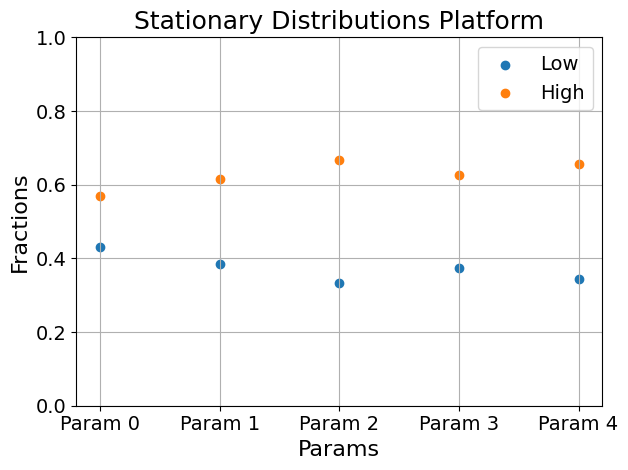

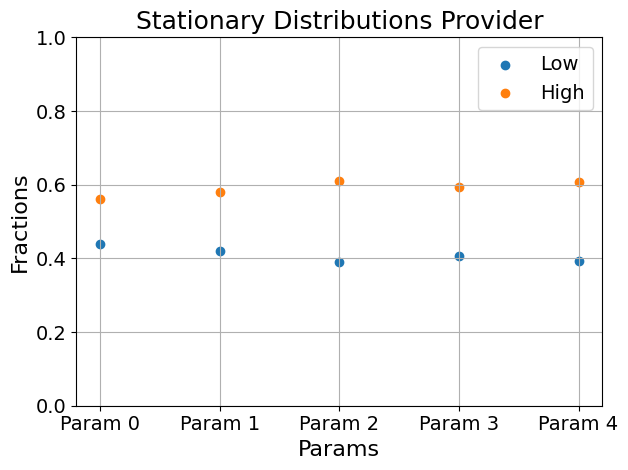

In [2]:
strategies_countss = [[25, 25, 25, 25], [25, 25], [25, 25]]
actions_names = [["Low", "High", "Bad Exp", "Good Exp"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H", "B", "G"], ["L", "H"], ["L", "H"]]
players_names = ["Consumer", "Platform", "Provider"]


a = 0.2
s = 0.1 
ul = 0.2
uh = 0.4
r1s = [0.4, 0.0, 0.0, 0.4, 0.4]
r2s = [0.0, 0.4, 0.8, 0.4, 0.8]

model_name = "valued_watch_time"
folder = posixpath.join(OUTPUT_PATH, model_name)
stationary_distributions = []

for i, params in enumerate(zip(r1s, r2s)):
    r1, r2 = params
    payoff_valued_watch_time = {
        (0, 0, 0): [s, a,  a],  
        (0, 0, 1): [0,  0,  0],   
        (0, 1, 0): [0, 0,  0],   
        (0, 1, 1): [0,  0,  0],   
    
        (1, 0, 0): [0, 0,  0],  
        (1, 0, 1): [0, 0,  0],   
        (1, 1, 0): [0, 0,  0],   
        (1, 1, 1): [s, a+r2,  a], 
        
        (2, 0, 0): [s+ul, a+r1,  a],  
        (2, 0, 1): [0,  0,  0],   
        (2, 1, 0): [0, 0,  0],   
        (2, 1, 1): [0,  0,  0],   
        
        (3, 0, 0): [0, 0,  0],   
        (3, 0, 1): [0, 0,  0],   
        (3, 1, 0): [0, 0,  0],   
        (3, 1, 1): [s+uh, a+r1+r2,  a] 
    }


    payoff_matrix = payoff_valued_watch_time
    game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)
    print(f"(r1, r2): ({r1}, {r2}) | (ul, uh): ({ul}, {uh})")
    matrix, states = game.compute_trans_matrix(beta=0.08)
    filename_suffix = f"(r1, r2)({r1}, {r2}) - (ul, uh)({ul}, {uh})_{model_name}.png"
    filepath = posixpath.join(folder, f"trans_matrix {filename_suffix}")
    game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=150, save_file_name=filepath)
    stationary_distributions.append(game.compute_stationary_distribution(matrix))
    green = [(1,1,1), (3,1,1)]
    red = [(0,0,0), (2,0,0)]

    filepath = posixpath.join(folder, f"stat_distr_all_pop {filename_suffix}")
    game.plot_stationary_distribution_all_pop(stationary_distributions[i], actions_symbols=actions_symbols, states=states, title="Stationary Distribution All Populations", ylabel="Fraction of Time", red=red, green=green, save_file_name=filepath)

    for player in range(len(players_names)):
        filepath = posixpath.join(folder, f"stat_distr_per_pop_{players_names[player]} {filename_suffix}")
        game.plot_stationary_distribution_per_pop(stationary_distributions[i], player=player, actions_symbols=actions_symbols, states=states, title=f"Stationary Distribution ({players_names[player]})", ylabel="Fraction of Time", save_file_name=filepath)


plot_states = [(0,0,0), (2,0,0), (1,1,1), (3,1,1)]
filepath = posixpath.join(folder, f"stat_distrs_all_pop_{model_name}")
game.plot_stationary_distributions_all_pop(stationary_distributions, states, plot_states, actions_symbols, save_file_name=filepath)

for player in range(len(players_names)):
    filepath = posixpath.join(folder, f"stat_distrs_per_pop_{players_names[player]}_{model_name}")
    game.plot_stationary_distributions_per_pop(stationary_distributions, states, actions_symbols, actions_names, players_names=players_names, player=player, save_file_name=filepath)
